<a href="https://colab.research.google.com/github/Rin4797/Data_Augmentation_Research/blob/main/drafts/Model_tries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pickle

import tensorflow as tf

from keras.models import Sequential
# from keras.layers.core import Dense, Activation, Flatten
# from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop, Adam, SGD

In [24]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8311665681126852422
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14357954560
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5845963116294762155
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [25]:
# загрузка файла с классом для визуализации

from google.colab import files
files.upload()

Saving visualization.py to visualization (1).py


{'visualization (1).py': b'import numpy as np\nimport matplotlib.pyplot as plt\nimport pandas as pd\n\nimport pickle\n\nimport tensorflow as tf\n\nfrom sklearn.utils import shuffle\n\nfrom sklearn.metrics import accuracy_score, confusion_matrix, classification_report\nfrom sklearn.metrics import multilabel_confusion_matrix\n\n\ndef draw_dataframe(df, title):\n    fig, ax = plt.subplots(figsize=(7.5, 7.5))\n    fig.patch.set_visible(False)\n    ax.axis(\'off\')\n    ax.axis(\'tight\')\n    table = ax.table(cellText=df.values, colLabels=df.columns, loc=\'center\')\n    plt.title(title, fontsize=18)\n    fig.tight_layout()\n    plt.show()\n\n\nclass DataVisualization:\n\n    def __init__(self, label_names, x_train, y_train, x_test, y_test, x_val=np.zeros((0, 3072)), y_val=np.zeros((0, )),\n                 y_vect_train=np.zeros((0, 10)), y_vect_test=np.zeros((0, 10)), y_vect_val=np.zeros((0, 10)),\n                 x_image_train=np.zeros((0, 32, 32, 3)), x_image_test=np.zeros((0, 32, 32, 

In [26]:
import sys
import os

py_file_location = "/content/visualization.py"
sys.path.append(os.path.abspath(py_file_location))

In [27]:
from visualization import DataVisualization, ModelVisualization, draw_dataframe

# Датасет

## Загрузка датасета

In [28]:
!mkdir data
%cd data

mkdir: cannot create directory ‘data’: File exists
/content/data


In [29]:
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvf 'cifar-10-python.tar.gz'
!rm cifar-10-python.tar.gz

--2023-09-17 16:44:59--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  46.9MB/s    in 3.6s    

2023-09-17 16:45:02 (44.8 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [30]:
%cd cifar-10-batches-py
!ls
%cd ..
%cd ..

/content/data/cifar-10-batches-py
batches.meta  data_batch_2  data_batch_4  readme.html
data_batch_1  data_batch_3  data_batch_5  test_batch
/content/data
/content


## Формирование данных

In [31]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [32]:
# список названия классов

cifar_label_data = unpickle('data/cifar-10-batches-py/batches.meta')
label_names = cifar_label_data[b'label_names']
for i in range(len(label_names)):
    label_names[i] = label_names[i].decode('ASCII')
label_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [33]:
def unpack_batch(batch_name):
    cifar_data = unpickle('data/cifar-10-batches-py/' + batch_name)
    data = cifar_data[b'data']
    labels = np.array(cifar_data[b'labels'])
    return data, labels

In [34]:
x_train = np.empty((0, 3072))
y_train = np.empty((0, ))
for i in range(5):
    data, labels = unpack_batch('data_batch_' + str(i + 1))
    x_train = np.concatenate((x_train, data), axis=0)
    y_train = np.concatenate((y_train, labels), axis=0)
print(x_train.shape, y_train.shape)

(50000, 3072) (50000,)


In [35]:
x_test, y_test = unpack_batch('test_batch')
print(x_test.shape, y_test.shape)

(10000, 3072) (10000,)


In [36]:
data = DataVisualization(label_names, x_train, y_train, x_test, y_test)

In [37]:
data.shuffle_data()
data.make_val(1000)
data.make_data()

## Описание датасета

In [38]:
data.make_data_stat()

In [39]:
data.size_data_analysis()

,name,size,std
0,train,49000,9.570789
1,val,1000,9.570789
2,test,10000,0.000000


In [40]:
data.class_data_analysis()

,name,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
0,train,4902,4885,4911,4902,4906,4894,4892,4896,4893,4919
1,val,98,115,89,98,94,106,108,104,107,81
2,test,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


# Нейросети

## MobileNet

In [41]:
model1 = tf.keras.applications.MobileNet(
    input_shape=(32, 32, 3), #image_size
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=True,
    weights=None,
    input_tensor=None,
    pooling=None,
    classes=10, #cifar-10
    classifier_activation="softmax"
)

In [42]:
model1.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [43]:
model1.summary()

Model: "mobilenet_1.00_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 16, 16, 32)        864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 16, 16, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 16, 16, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 16, 16, 32)        288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 16, 16, 32)  

## EfficientNet

In [45]:
model2 = tf.keras.applications.EfficientNetB0(
    input_shape=(32, 32, 3), #image_size
    include_top=True,
    weights=None,
    input_tensor=None,
    pooling=None,
    classes=10, #cifar-10
    classifier_activation="softmax",
)

In [46]:
model2.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])

In [47]:
model2.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 32, 32, 3)            0         ['input_3[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 32, 32, 3)            7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv_pad (ZeroPadding  (None, 33, 33, 3)            0         ['normalization[0

# Работа моделей

In [48]:
def run_model(model_work, epochs_num):
    model_work.model_fit(epochs_num)
    model_work.draw_model_plot()
    model_work.draw_model_results()

In [49]:
def result_model(model_work):
    model_work.make_predictions()
    model_work.draw_confusion_matrix()
    draw_dataframe(model_work.metrics(), 'model_results')

### MobileNet

In [50]:
model1_work = ModelVisualization(model1, data)

Epoch 1/50
766/766 [==============================] - 38s 16ms/step - loss: 1.9323 - accuracy: 0.2909 - val_loss: 1.7742 - val_accuracy: 0.3440
Epoch 2/50
766/766 [==============================] - 12s 15ms/step - loss: 1.5607 - accuracy: 0.4321 - val_loss: 1.6546 - val_accuracy: 0.4070
Epoch 3/50
766/766 [==============================] - 11s 15ms/step - loss: 1.4149 - accuracy: 0.4912 - val_loss: 1.5828 - val_accuracy: 0.4600
Epoch 4/50
766/766 [==============================] - 12s 16ms/step - loss: 1.2616 - accuracy: 0.5496 - val_loss: 1.4775 - val_accuracy: 0.5040
Epoch 5/50
766/766 [==============================] - 11s 15ms/step - loss: 1.1754 - accuracy: 0.5850 - val_loss: 1.2924 - val_accuracy: 0.5370
Epoch 6/50
766/766 [==============================] - 11s 15ms/step - loss: 1.0732 - accuracy: 0.6223 - val_loss: 1.4210 - val_accuracy: 0.5510
Epoch 7/50
766/766 [==============================] - 11s 15ms/step - loss: 0.9892 - accuracy: 0.6546 - val_loss: 1.1948 - val_accuracy:

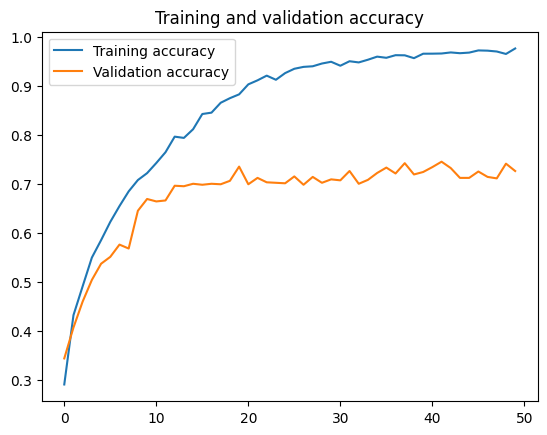

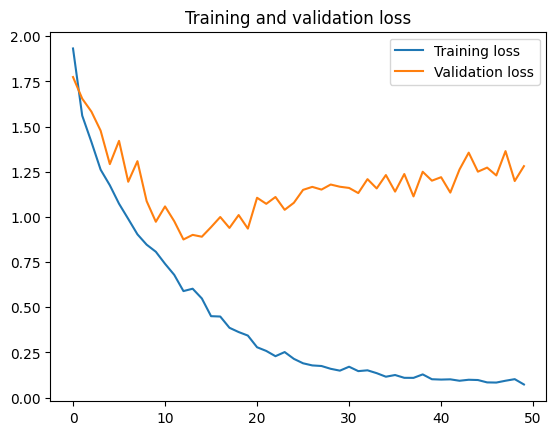

313/313 [==============================] - 3s 6ms/step - loss: 1.3733 - accuracy: 0.7169
Accuracy for test data :  0.7168999910354614
Loss for test data :  1.3732855319976807


In [51]:
run_model(model1_work, 50)

157/157 [==============================] - 1s 4ms/step


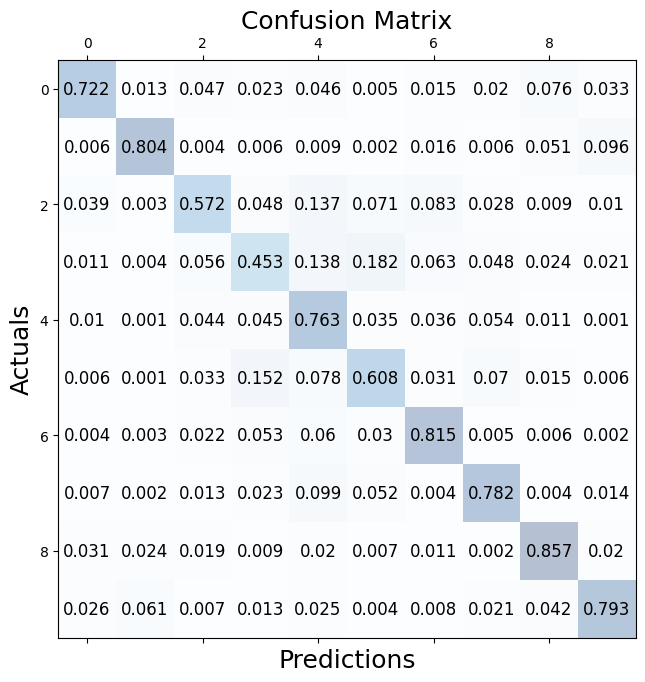

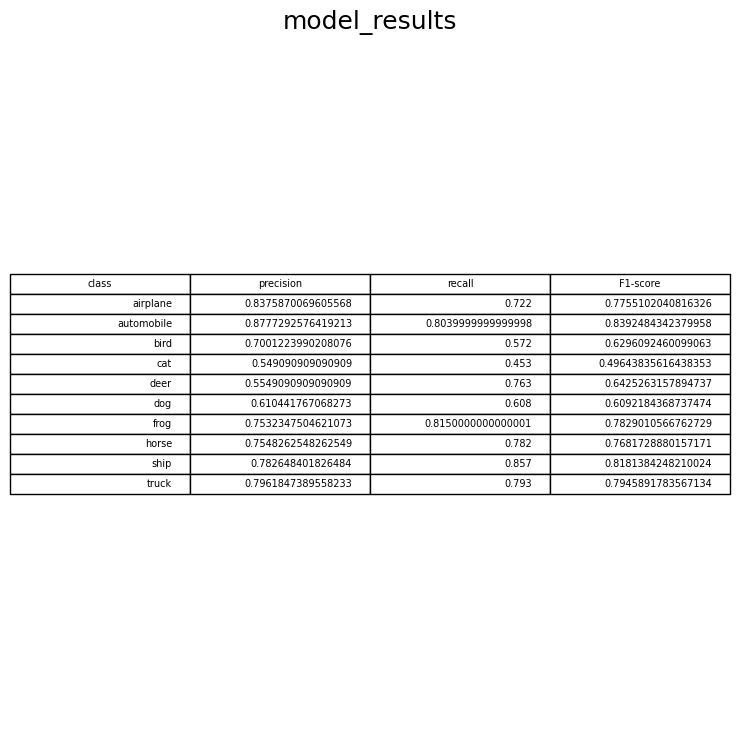

In [52]:
result_model(model1_work)

### EfficientNet

In [53]:
model2_work = ModelVisualization(model2, data)

Epoch 1/50
766/766 [==============================] - 68s 45ms/step - loss: 2.6421 - accuracy: 0.2329 - val_loss: 1.8614 - val_accuracy: 0.2610
Epoch 2/50
766/766 [==============================] - 31s 40ms/step - loss: 2.0856 - accuracy: 0.3430 - val_loss: 1.7087 - val_accuracy: 0.3280
Epoch 3/50
766/766 [==============================] - 32s 41ms/step - loss: 1.8877 - accuracy: 0.4140 - val_loss: 1.8605 - val_accuracy: 0.4190
Epoch 4/50
766/766 [==============================] - 31s 40ms/step - loss: 1.7056 - accuracy: 0.4631 - val_loss: 1.4521 - val_accuracy: 0.4710
Epoch 5/50
766/766 [==============================] - 31s 41ms/step - loss: 1.6403 - accuracy: 0.4971 - val_loss: 3.6822 - val_accuracy: 0.4560
Epoch 6/50
766/766 [==============================] - 33s 43ms/step - loss: 1.5323 - accuracy: 0.5348 - val_loss: 2.4902 - val_accuracy: 0.4880
Epoch 7/50
766/766 [==============================] - 31s 40ms/step - loss: 1.3908 - accuracy: 0.5670 - val_loss: 1.3544 - val_accuracy:

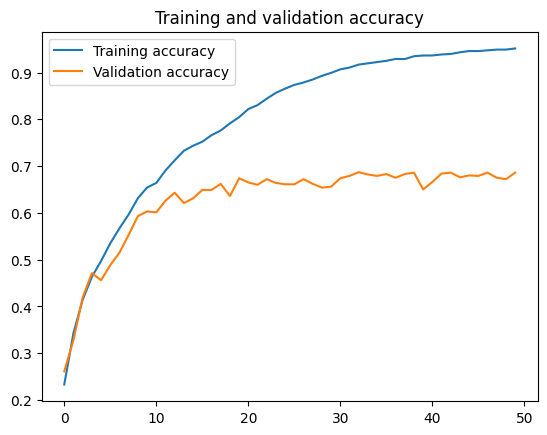

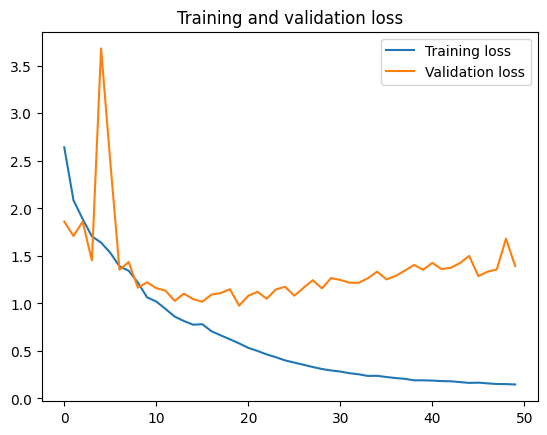

313/313 [==============================] - 6s 13ms/step - loss: 1.3933 - accuracy: 0.6927
Accuracy for test data :  0.6927000284194946
Loss for test data :  1.3933075666427612


In [54]:
run_model(model2_work, 50)

157/157 [==============================] - 3s 8ms/step


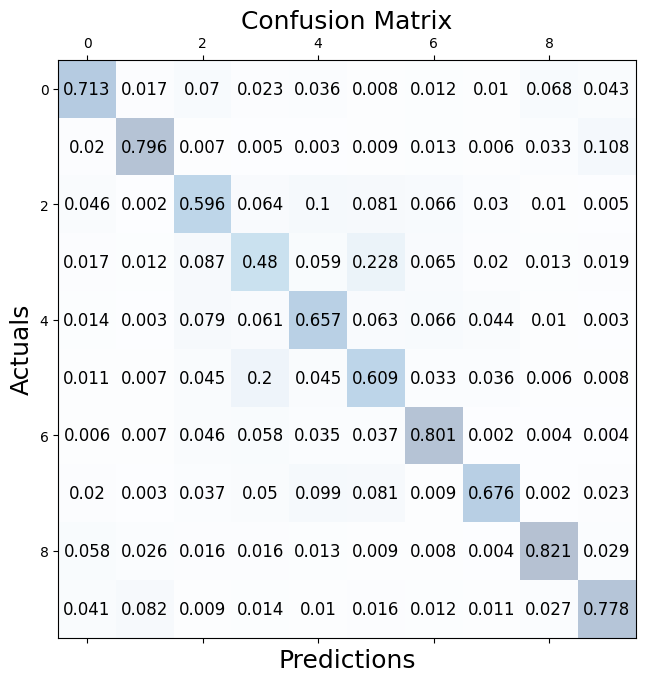

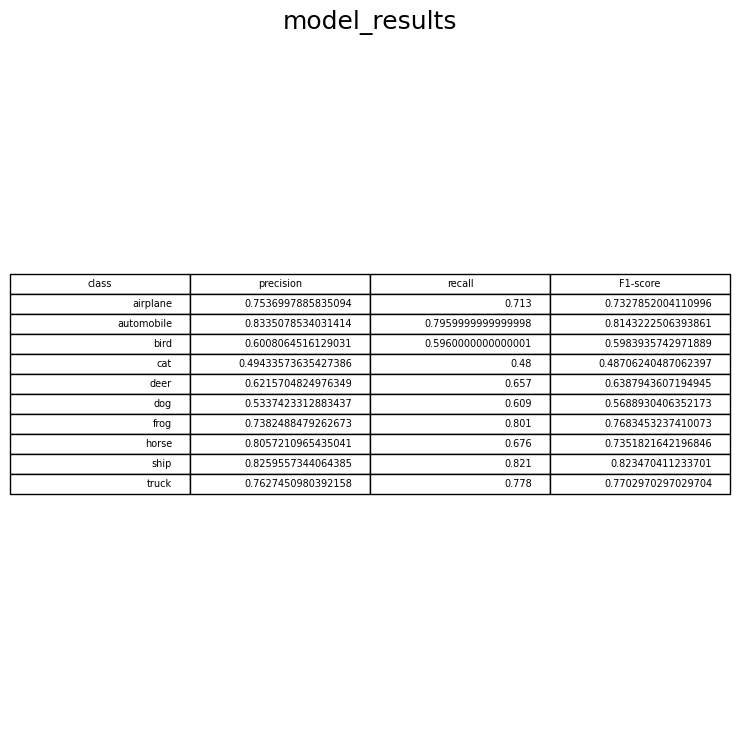

In [55]:
result_model(model2_work)